# <font color='Purple'>**DICOM to NIfTI conversion using Nibabel**</font>

## <font color='green'>**1. Dataset Information**</font>
The data is taken from here (https://zenodo.org/record/16956#.YFMM5PtKiV5), "An MRI DICOM data set of the head of a normal male human aged 52", by Lionheart, William R.B.

This zip file contains a DICOM data set of magnetic resonance images  a normal male mathematics professor aged 52. The experimental subject is the author. The MRI scans are T2 weighted  turbo-spin-echo (T2W TSE) and T1 weighted Fast Field Echo (T1W FFE).

The subject suffers from a small vertical strabismus (hypertropia), a misalignment of the eyes, which is visible in this data set.

The author would like to thank the Radiology Department at the Macclesfield General Hospital for performing the scan.

**License**: License (for files):
 [Creative Commons Attribution Share Alike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/legalcode)

**Data Citation**: Lionheart, W. R. B. (2015). An MRI DICOM data set of the head of a normal male human aged 52 [Data set]. Zenodo. https://doi.org/10.5281/zenodo.16956

## <font color='green'>**2. Import the Required Libraries & Modules**</font>
* pathlib for easy path handling
* pydicom to handle dicom files
* matplotlib for visualization
* numpy to create the 3D container
* It can be very useful to convert DICOM files to the NIftI format before further processing as NIfTI files are easier to handle. There are many tools, dicom2nifti is used here.
* nibabel to handle nifti files



In [1]:
pip install dicom2nifti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path # pathlib for easy path handling
import pydicom # pydicom to handle dicom files
import matplotlib.pyplot as plt
import numpy as np
import dicom2nifti # to convert DICOM files to the NIftI format
import nibabel as nib # nibabel to handle nifti files

## <font color='green'>**3. Load the DICOM files of MRI Head images**</font>
Use the Path function to return all items in a directory which correspond to the provided pattern.
As in this case, the directory only contains the DICOM files. DICOM to NIfTI conversion is to be done on MRI DICOM data set  downloaded from Zenodo site, all files in it can be converted.

In [3]:
head_mri_dicom = Path("/kaggle/input/zenodo-mri-dicom-data-set/SE000001")
dicom2nifti.convert_directory(head_mri_dicom, ".")

## <font color='green'>**4. Read & Explore NIfTI files**</font>
The file 201_t2w_tse.nii.gz is created by conversion of the head_mri_dicom file. This single NIfTI file created above contains the complete 3D mri scan!
Load it by using nib.load(path) 

In [4]:
nifti = nib.load('201_t2w_tse.nii.gz')

Print this object in order to look at metadata including the NIftI header information.

In [5]:
print(nifti)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

To access single header entries; access single metadata entries as follows

In [6]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [7]:
print(nifti.shape) # get the image shape
print(nifti.header.get_data_shape()) # get the image shape in a different way

(256, 256, 27)
(256, 256, 27)


Obtaining image **pixel data**: The image pixel data can be extracted using the *get_fdata()* function of the nifti object.

In [8]:
head_mri = nifti.get_fdata()
print(head_mri.dtype, head_mri.shape)

float64 (256, 256, 27)


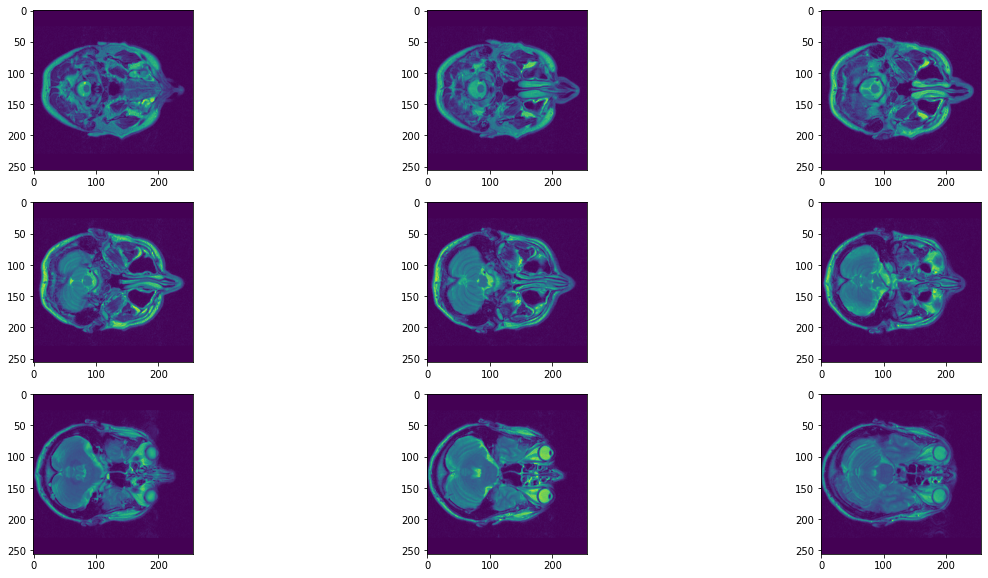

In [9]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[:,:,slice_counter])
        slice_counter+=1

Don't forget to pass cmap="gray" to imshow, otherwise the images will look quite odd

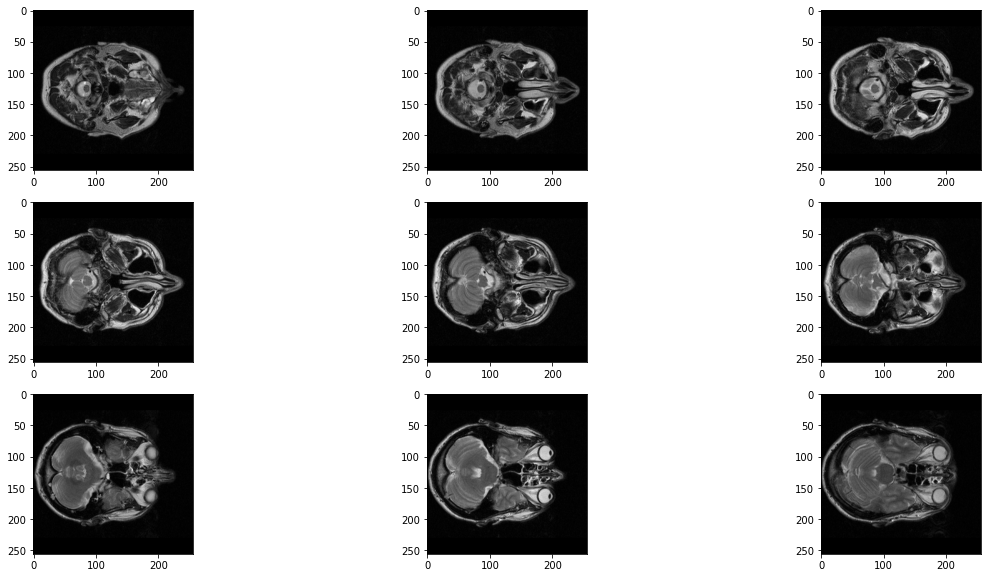

In [10]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[:,:,slice_counter], cmap="gray")
        slice_counter+=1

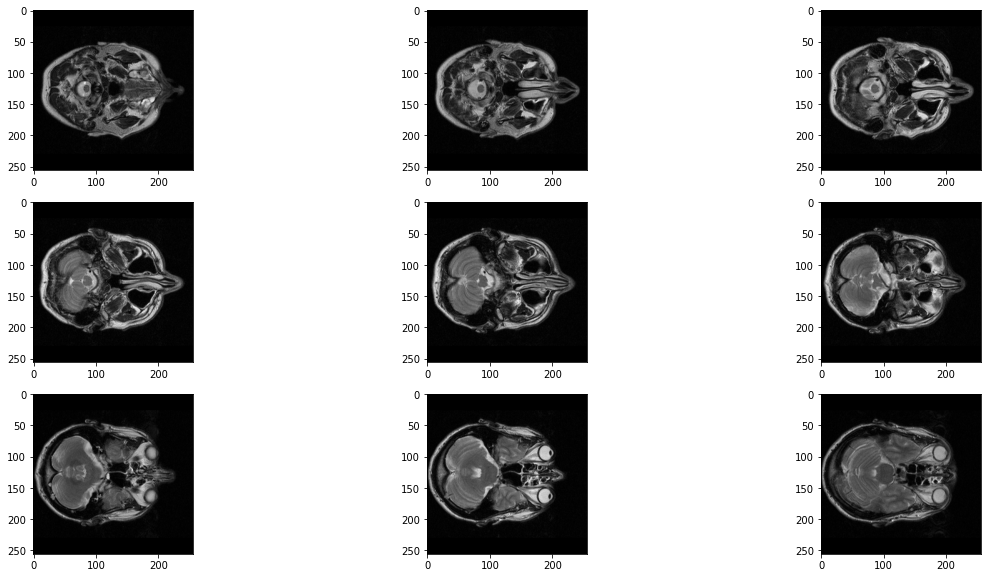

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(20,10))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(head_mri[:,:,i], cmap="gray")
plt.show();
plt.tight_layout();

## <font color='green'>**5. Write NIfTI files**</font>
Many times, image data obtained as the results of an algorithm or processing step has to be stored in the NIfTI format. This can be easily done using NiBabel. As an example, the 3D image array from above can be used to perform a simple processing step and save it as a new NIfTI file.

In [12]:
# Here apply a very simple threshold and set all image voxels to 0 that have a value smaller than 300
head_mri_processed = head_mri * (head_mri>300)

(-0.5, 255.5, 255.5, -0.5)

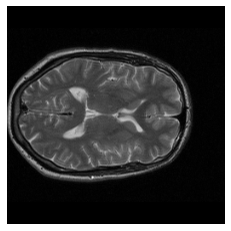

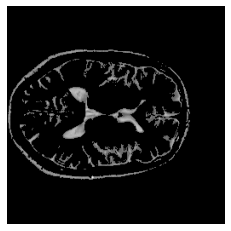

In [13]:
# Now have a look at the results of this processing step (plotting slice number 13) 
plt.imshow(head_mri[:,:,13],cmap="gray") # plot the original image
plt.axis("off")
plt.figure()
plt.imshow(head_mri_processed[:,:,13],cmap="gray") # plot the processed image
plt.axis("off")

To save this, first, convert the processed head_mri image array file  back to a nifti object by using the numpy array of the processed image and header information about the image geometry (affine matrix) from the original NIftI file.

In [14]:
processed_nifti = nib.Nifti1Image(head_mri_processed, nifti.affine)

Now save the processed image using the save function in NiBabel

In [15]:
nib.save(processed_nifti, '201_t2w_tse_processed.nii.gz')